In [85]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

In [87]:
df =pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

In [89]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [91]:
df.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [93]:
df.shape

(374, 13)

In [95]:
df['Sleep Disorder'].value_counts()

Sleep Disorder
Sleep Apnea    78
Insomnia       77
Name: count, dtype: int64

In [97]:
new_df = df.iloc[:, :12]

In [99]:
# Split BloodPressure into systolic and diastolic
new_df[['Systolic', 'Diastolic']] = new_df['Blood Pressure'].str.split('/', expand=True)
new_df['Systolic'] = new_df['Systolic'].astype(float)
new_df['Diastolic'] = new_df['Diastolic'].astype(float)


In [101]:
# Drop the original text column
new_df = new_df.drop(columns=['Blood Pressure'])

In [103]:
new_df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Systolic,Diastolic
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,126.0,83.0
1,2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,125.0,80.0
2,3,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,125.0,80.0
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,140.0,90.0
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,140.0,90.0


In [105]:
new_df['Gender'].value_counts()
new_df['Occupation'].value_counts()

Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: count, dtype: int64

In [107]:
Occupation_count= new_df['Occupation'].value_counts()
valid_Occupation= Occupation_count[Occupation_count>30].index.tolist()
print(valid_Occupation)

['Nurse', 'Doctor', 'Engineer', 'Lawyer', 'Teacher', 'Accountant', 'Salesperson']


In [109]:
new_df['Occupation'] = new_df['Occupation'].apply(lambda x:x if x in valid_Occupation else 'others' )
# categories_with_others = valid_brand + ['others']

In [111]:
new_df['Occupation'].value_counts()

Occupation
Nurse          73
Doctor         71
Engineer       63
Lawyer         47
Teacher        40
Accountant     37
Salesperson    32
others         11
Name: count, dtype: int64

In [113]:
x= new_df.drop(columns=['BMI Category','Person ID'])
y= new_df['BMI Category']

In [115]:
x.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic,Diastolic
0,Male,27,others,6.1,6,42,6,77,4200,126.0,83.0
1,Male,28,Doctor,6.2,6,60,8,75,10000,125.0,80.0
2,Male,28,Doctor,6.2,6,60,8,75,10000,125.0,80.0
3,Male,28,others,5.9,4,30,8,85,3000,140.0,90.0
4,Male,28,others,5.9,4,30,8,85,3000,140.0,90.0


In [117]:
x_train,x_test,y_train, y_test= train_test_split(x,y,test_size=0.2, random_state=42)

In [119]:
x_train.shape

(299, 11)

In [121]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
transformer= ColumnTransformer(transformers=[
            ('tnfs1',OneHotEncoder(categories=[['Male','Female']],sparse_output=False,drop='first',handle_unknown='ignore'),['Gender']),
            ('tnf2', OneHotEncoder(categories=[['Nurse','Doctor','Engineer','Lawyer','Teacher','Accountant','Salesperson','others']],sparse_output=False,drop='first',handle_unknown='ignore'),['Occupation'])
],remainder='passthrough')

In [123]:
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

In [125]:
x_train_transformed=transformer.fit_transform(x_train)
x_test_transformed = transformer.transform(x_test)
# x_train_view= pd.DataFrame(x_train_transformed, columns= transformer.get_feature_names_out())
# x_test_view = pd.DataFrame(x_test_transformed, columns=transformer.get_feature_names_out())
# x_train_view.sample(5)
# x_test_view.sample(5)

In [127]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train_transformed)   # learn scaling from train
X_test_scaled = scaler.transform(x_test_transformed)         # apply same scaling to test


In [129]:
# from sklearn.linear_model import LogisticRegression

# model = LogisticRegression(max_iter=1000, solver='saga')   # increased iterations
# model.fit(x_train_transformed, y_train_encoded)


Text(0.5, 1.0, 'QQ pot')

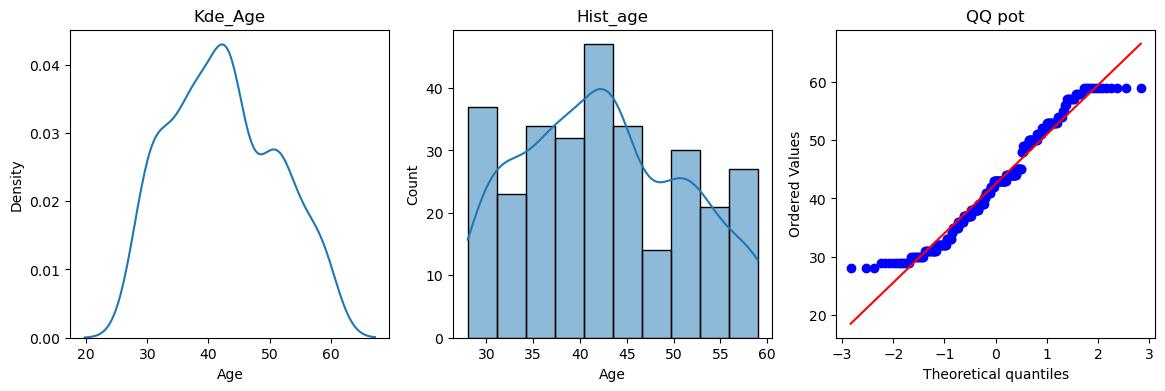

In [131]:
plt.figure(figsize=[14,4])
plt.subplot(131)
sns.kdeplot(x_train['Age'])
plt.title("Kde_Age")

plt.subplot(132)
sns.histplot(x_train['Age'], kde=True)
plt.title("Hist_age")

plt.subplot(133)
stats.probplot(x_train['Age'], dist='norm', plot=plt)
plt.title('QQ pot')

In [132]:
print(x_train.columns.tolist())

['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps', 'Systolic', 'Diastolic']


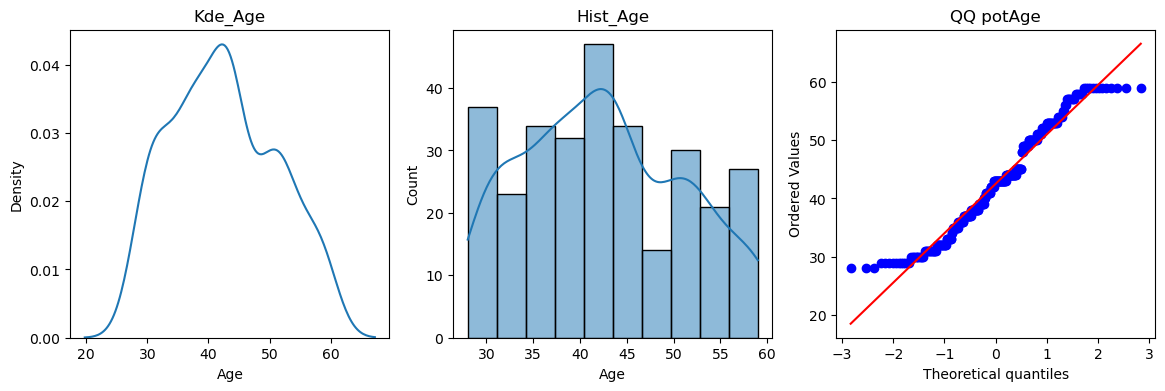

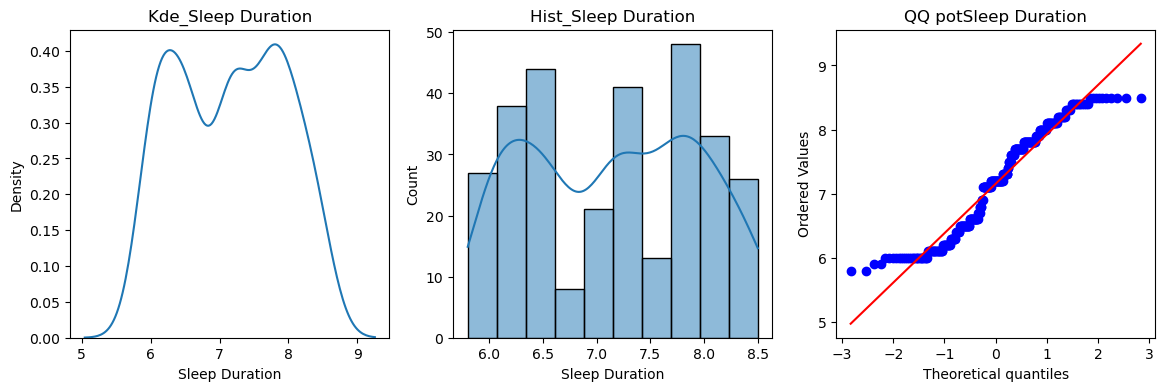

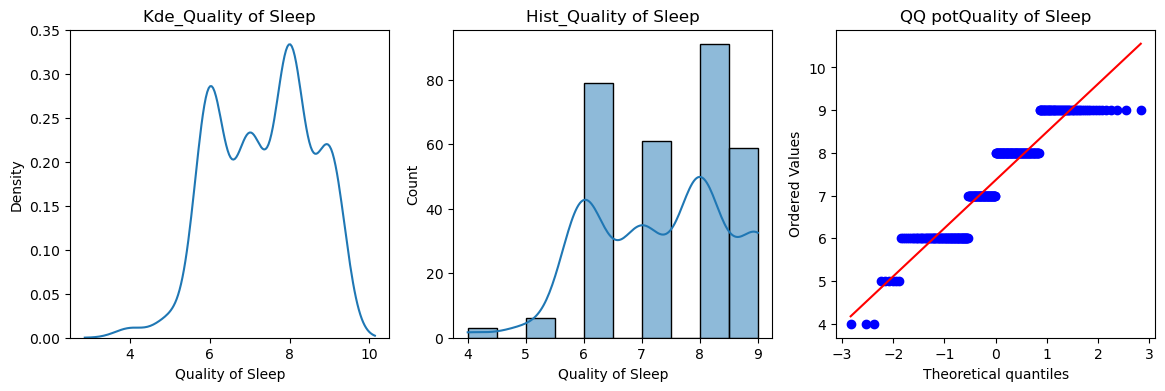

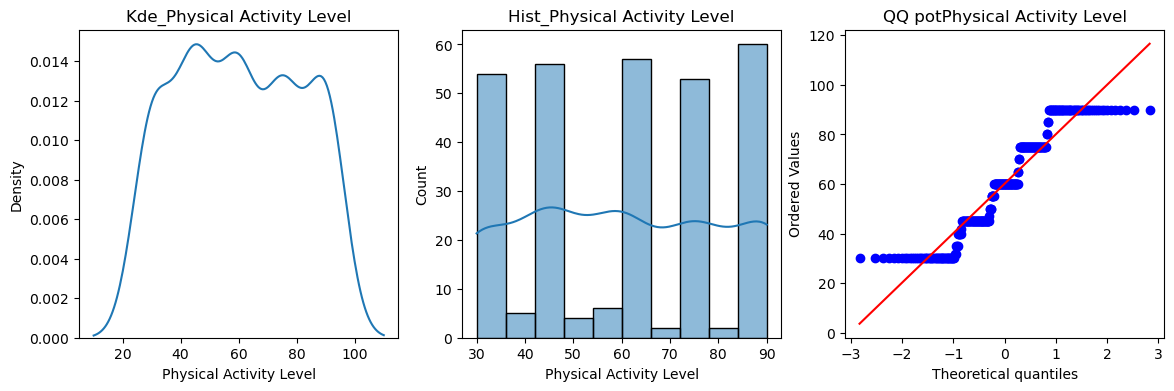

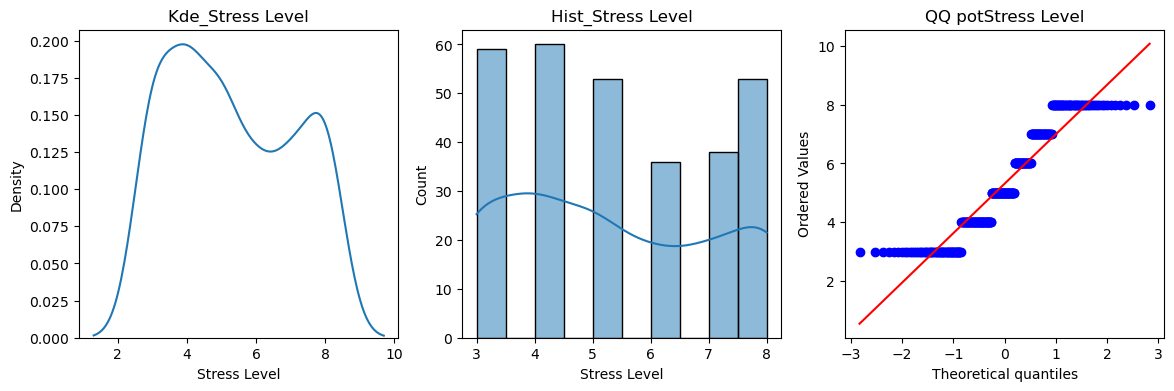

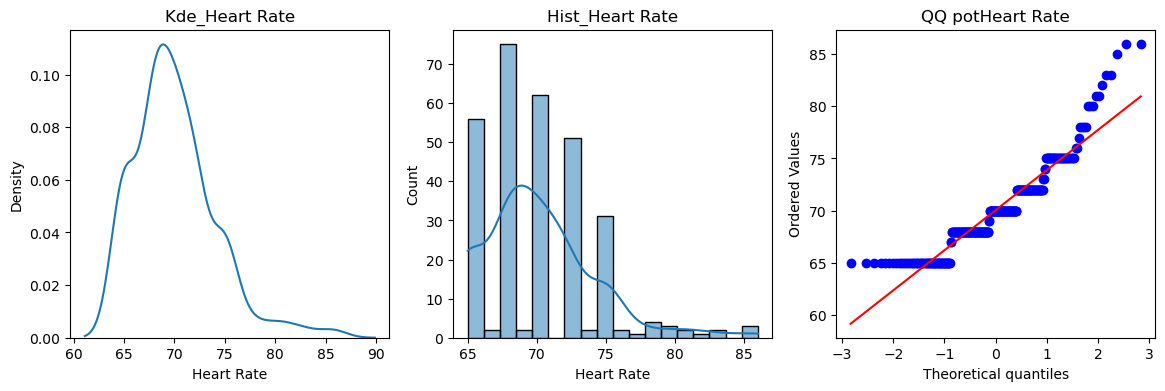

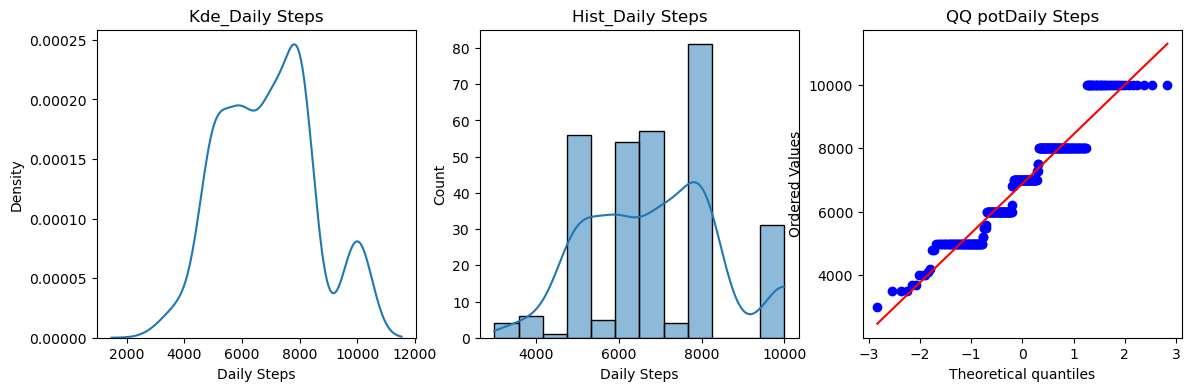

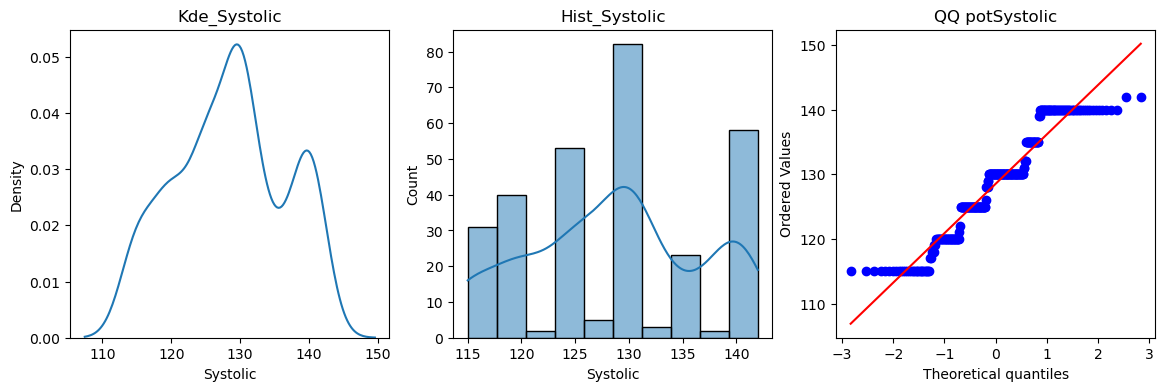

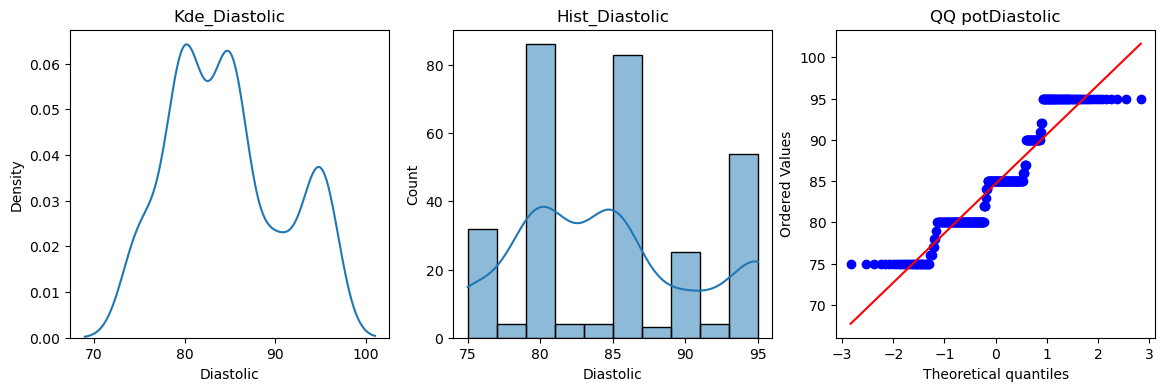

In [133]:
for col in x_train.columns:
    if pd.api.types.is_numeric_dtype(x_train[col]):
         plt.figure(figsize=[14,4])
         plt.subplot(131)
         sns.kdeplot(x_train[col])
         plt.title("Kde_"+col)

         plt.subplot(132)
         sns.histplot(x_train[col], kde=True)
         plt.title("Hist_"+col)

         plt.subplot(133)
         stats.probplot(x_train[col], dist='norm', plot=plt)
         plt.title('QQ pot'+col)

In [136]:
clf1= LogisticRegression()
clf2= DecisionTreeClassifier()

In [137]:
clf1.fit(X_train_scaled, y_train_encoded)
clf2.fit(X_train_scaled, y_train_encoded)

y_pred1 = clf1.predict(X_test_scaled)
y_pred2 = clf2.predict(X_test_scaled)

In [141]:
print("Logistic Regression Accuracy:", accuracy_score(y_test_encoded, y_pred1))
print("Decision Tree Accuracy:", accuracy_score(y_test_encoded, y_pred2))

Logistic Regression Accuracy: 0.9733333333333334
Decision Tree Accuracy: 1.0
